number of unique words:  9
Train on 52 samples
Epoch 1/1000
52/52 [==============================] - 0s 5ms/sample - loss: 2.2198
Epoch 2/1000
52/52 [==============================] - 0s 36us/sample - loss: 2.2187
Epoch 3/1000
52/52 [==============================] - 0s 26us/sample - loss: 2.2177
Epoch 4/1000
52/52 [==============================] - 0s 33us/sample - loss: 2.2166
Epoch 5/1000
52/52 [==============================] - 0s 35us/sample - loss: 2.2156
Epoch 6/1000
52/52 [==============================] - 0s 30us/sample - loss: 2.2145
Epoch 7/1000
52/52 [==============================] - 0s 32us/sample - loss: 2.2135
Epoch 8/1000
52/52 [==============================] - 0s 47us/sample - loss: 2.2125
Epoch 9/1000
52/52 [==============================] - 0s 49us/sample - loss: 2.2114
Epoch 10/1000
52/52 [==============================] - 0s 26us/sample - loss: 2.2104
Epoch 11/1000
52/52 [==============================] - 0s 88us/sample - loss: 2.2094
Epoch 12/1000
52/52 [=======

Epoch 97/1000
52/52 [==============================] - 0s 36us/sample - loss: 2.1329
Epoch 98/1000
52/52 [==============================] - 0s 59us/sample - loss: 2.1321
Epoch 99/1000
52/52 [==============================] - 0s 69us/sample - loss: 2.1313
Epoch 100/1000
52/52 [==============================] - 0s 46us/sample - loss: 2.1305
Epoch 101/1000
52/52 [==============================] - 0s 71us/sample - loss: 2.1297
Epoch 102/1000
52/52 [==============================] - 0s 30us/sample - loss: 2.1289
Epoch 103/1000
52/52 [==============================] - 0s 69us/sample - loss: 2.1281
Epoch 104/1000
52/52 [==============================] - 0s 34us/sample - loss: 2.1273
Epoch 105/1000
52/52 [==============================] - 0s 41us/sample - loss: 2.1265
Epoch 106/1000
52/52 [==============================] - 0s 33us/sample - loss: 2.1257
Epoch 107/1000
52/52 [==============================] - 0s 49us/sample - loss: 2.1249
Epoch 108/1000
52/52 [==============================] - 0

Epoch 193/1000
52/52 [==============================] - 0s 32us/sample - loss: 2.0580
Epoch 194/1000
52/52 [==============================] - 0s 56us/sample - loss: 2.0572
Epoch 195/1000
52/52 [==============================] - 0s 60us/sample - loss: 2.0565
Epoch 196/1000
52/52 [==============================] - 0s 50us/sample - loss: 2.0557
Epoch 197/1000
52/52 [==============================] - 0s 58us/sample - loss: 2.0550
Epoch 198/1000
52/52 [==============================] - 0s 38us/sample - loss: 2.0542
Epoch 199/1000
52/52 [==============================] - 0s 74us/sample - loss: 2.0535
Epoch 200/1000
52/52 [==============================] - 0s 46us/sample - loss: 2.0527
Epoch 201/1000
52/52 [==============================] - 0s 40us/sample - loss: 2.0520
Epoch 202/1000
52/52 [==============================] - 0s 48us/sample - loss: 2.0512
Epoch 203/1000
52/52 [==============================] - 0s 43us/sample - loss: 2.0505
Epoch 204/1000
52/52 [==============================] 

Epoch 289/1000
52/52 [==============================] - 0s 60us/sample - loss: 1.9900
Epoch 290/1000
52/52 [==============================] - 0s 58us/sample - loss: 1.9893
Epoch 291/1000
52/52 [==============================] - 0s 39us/sample - loss: 1.9887
Epoch 292/1000
52/52 [==============================] - 0s 37us/sample - loss: 1.9880
Epoch 293/1000
52/52 [==============================] - 0s 41us/sample - loss: 1.9874
Epoch 294/1000
52/52 [==============================] - 0s 31us/sample - loss: 1.9867
Epoch 295/1000
52/52 [==============================] - 0s 48us/sample - loss: 1.9861
Epoch 296/1000
52/52 [==============================] - 0s 45us/sample - loss: 1.9854
Epoch 297/1000
52/52 [==============================] - 0s 48us/sample - loss: 1.9848
Epoch 298/1000
52/52 [==============================] - 0s 48us/sample - loss: 1.9842
Epoch 299/1000
52/52 [==============================] - 0s 45us/sample - loss: 1.9835
Epoch 300/1000
52/52 [==============================] 

Epoch 385/1000
52/52 [==============================] - 0s 42us/sample - loss: 1.9345
Epoch 386/1000
52/52 [==============================] - 0s 41us/sample - loss: 1.9340
Epoch 387/1000
52/52 [==============================] - 0s 31us/sample - loss: 1.9335
Epoch 388/1000
52/52 [==============================] - 0s 58us/sample - loss: 1.9330
Epoch 389/1000
52/52 [==============================] - 0s 36us/sample - loss: 1.9325
Epoch 390/1000
52/52 [==============================] - 0s 47us/sample - loss: 1.9320
Epoch 391/1000
52/52 [==============================] - 0s 53us/sample - loss: 1.9315
Epoch 392/1000
52/52 [==============================] - 0s 60us/sample - loss: 1.9310
Epoch 393/1000
52/52 [==============================] - 0s 46us/sample - loss: 1.9305
Epoch 394/1000
52/52 [==============================] - 0s 39us/sample - loss: 1.9300
Epoch 395/1000
52/52 [==============================] - 0s 51us/sample - loss: 1.9295
Epoch 396/1000
52/52 [==============================] 

Epoch 481/1000
52/52 [==============================] - 0s 38us/sample - loss: 1.8924
Epoch 482/1000
52/52 [==============================] - 0s 43us/sample - loss: 1.8920
Epoch 483/1000
52/52 [==============================] - 0s 62us/sample - loss: 1.8916
Epoch 484/1000
52/52 [==============================] - 0s 47us/sample - loss: 1.8912
Epoch 485/1000
52/52 [==============================] - 0s 59us/sample - loss: 1.8908
Epoch 486/1000
52/52 [==============================] - 0s 34us/sample - loss: 1.8905
Epoch 487/1000
52/52 [==============================] - 0s 35us/sample - loss: 1.8901
Epoch 488/1000
52/52 [==============================] - 0s 38us/sample - loss: 1.8897
Epoch 489/1000
52/52 [==============================] - 0s 41us/sample - loss: 1.8893
Epoch 490/1000
52/52 [==============================] - 0s 70us/sample - loss: 1.8890
Epoch 491/1000
52/52 [==============================] - 0s 52us/sample - loss: 1.8886
Epoch 492/1000
52/52 [==============================] 

Epoch 577/1000
52/52 [==============================] - 0s 38us/sample - loss: 1.8600
Epoch 578/1000
52/52 [==============================] - 0s 44us/sample - loss: 1.8597
Epoch 579/1000
52/52 [==============================] - 0s 35us/sample - loss: 1.8594
Epoch 580/1000
52/52 [==============================] - 0s 65us/sample - loss: 1.8591
Epoch 581/1000
52/52 [==============================] - 0s 46us/sample - loss: 1.8588
Epoch 582/1000
52/52 [==============================] - 0s 68us/sample - loss: 1.8585
Epoch 583/1000
52/52 [==============================] - 0s 47us/sample - loss: 1.8582
Epoch 584/1000
52/52 [==============================] - 0s 43us/sample - loss: 1.8579
Epoch 585/1000
52/52 [==============================] - 0s 35us/sample - loss: 1.8576
Epoch 586/1000
52/52 [==============================] - 0s 28us/sample - loss: 1.8573
Epoch 587/1000
52/52 [==============================] - 0s 41us/sample - loss: 1.8570
Epoch 588/1000
52/52 [==============================] 

Epoch 673/1000
52/52 [==============================] - 0s 30us/sample - loss: 1.8342
Epoch 674/1000
52/52 [==============================] - 0s 31us/sample - loss: 1.8340
Epoch 675/1000
52/52 [==============================] - 0s 26us/sample - loss: 1.8337
Epoch 676/1000
52/52 [==============================] - 0s 32us/sample - loss: 1.8335
Epoch 677/1000
52/52 [==============================] - 0s 43us/sample - loss: 1.8333
Epoch 678/1000
52/52 [==============================] - 0s 39us/sample - loss: 1.8330
Epoch 679/1000
52/52 [==============================] - 0s 39us/sample - loss: 1.8328
Epoch 680/1000
52/52 [==============================] - 0s 47us/sample - loss: 1.8325
Epoch 681/1000
52/52 [==============================] - 0s 46us/sample - loss: 1.8323
Epoch 682/1000
52/52 [==============================] - 0s 34us/sample - loss: 1.8321
Epoch 683/1000
52/52 [==============================] - 0s 40us/sample - loss: 1.8318
Epoch 684/1000
52/52 [==============================] 

Epoch 769/1000
52/52 [==============================] - 0s 29us/sample - loss: 1.8133
Epoch 770/1000
52/52 [==============================] - 0s 44us/sample - loss: 1.8131
Epoch 771/1000
52/52 [==============================] - 0s 31us/sample - loss: 1.8129
Epoch 772/1000
52/52 [==============================] - 0s 33us/sample - loss: 1.8127
Epoch 773/1000
52/52 [==============================] - 0s 59us/sample - loss: 1.8125
Epoch 774/1000
52/52 [==============================] - 0s 44us/sample - loss: 1.8123
Epoch 775/1000
52/52 [==============================] - 0s 34us/sample - loss: 1.8121
Epoch 776/1000
52/52 [==============================] - 0s 42us/sample - loss: 1.8119
Epoch 777/1000
52/52 [==============================] - 0s 29us/sample - loss: 1.8117
Epoch 778/1000
52/52 [==============================] - 0s 31us/sample - loss: 1.8115
Epoch 779/1000
52/52 [==============================] - 0s 40us/sample - loss: 1.8113
Epoch 780/1000
52/52 [==============================] 

Epoch 865/1000
52/52 [==============================] - 0s 59us/sample - loss: 1.7961
Epoch 866/1000
52/52 [==============================] - 0s 48us/sample - loss: 1.7959
Epoch 867/1000
52/52 [==============================] - 0s 35us/sample - loss: 1.7958
Epoch 868/1000
52/52 [==============================] - 0s 42us/sample - loss: 1.7956
Epoch 869/1000
52/52 [==============================] - 0s 38us/sample - loss: 1.7955
Epoch 870/1000
52/52 [==============================] - 0s 32us/sample - loss: 1.7953
Epoch 871/1000
52/52 [==============================] - 0s 44us/sample - loss: 1.7951
Epoch 872/1000
52/52 [==============================] - 0s 40us/sample - loss: 1.7950
Epoch 873/1000
52/52 [==============================] - 0s 35us/sample - loss: 1.7948
Epoch 874/1000
52/52 [==============================] - 0s 33us/sample - loss: 1.7947
Epoch 875/1000
52/52 [==============================] - 0s 27us/sample - loss: 1.7945
Epoch 876/1000
52/52 [==============================] 

Epoch 961/1000
52/52 [==============================] - 0s 32us/sample - loss: 1.7819
Epoch 962/1000
52/52 [==============================] - 0s 57us/sample - loss: 1.7818
Epoch 963/1000
52/52 [==============================] - 0s 41us/sample - loss: 1.7816
Epoch 964/1000
52/52 [==============================] - 0s 23us/sample - loss: 1.7815
Epoch 965/1000
52/52 [==============================] - 0s 33us/sample - loss: 1.7814
Epoch 966/1000
52/52 [==============================] - 0s 34us/sample - loss: 1.7812
Epoch 967/1000
52/52 [==============================] - 0s 57us/sample - loss: 1.7811
Epoch 968/1000
52/52 [==============================] - 0s 40us/sample - loss: 1.7810
Epoch 969/1000
52/52 [==============================] - 0s 31us/sample - loss: 1.7808
Epoch 970/1000
52/52 [==============================] - 0s 29us/sample - loss: 1.7807
Epoch 971/1000
52/52 [==============================] - 0s 27us/sample - loss: 1.7806
Epoch 972/1000
52/52 [==============================] 

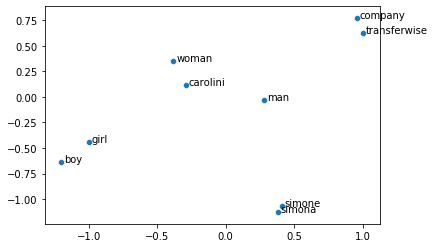

In [24]:
"""Creating word2vec type of algorithm from scratch."""

__author__ = 'simone carolini'

import numpy as np
import os
from scipy import sparse
from typing import Type, List, Union, Dict
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

from utils.util import text_processing
from utils.util import unit_test_true


# todo! this is just a test corpus.
text_corpus = ['simone carolini is a man, simona carolini is a woman, he is a man, he is a boy, girl is a woman',
               'transferwise is a company. transferwise is not a man. transferwise is not a woman']


def create_context_values(input_corpus: Type[List] = None, window_length: int = 2) -> Type[Union[List, List]]:
    corpus_processed, words_list = [], []
    for text in input_corpus:
        text = text_processing(text)  # Clean the text.
        corpus_processed.append(text)  # Append words.
        # Context words.
        for i, word in enumerate(text):
            for w in range(window_length):
                # Ahead of focus word.
                if i + 1 + w < len(text):
                    words_list.append([word] + [text[(i + 1 + w)]])
                if i - 1 - w >= 0:
                    words_list.append([word] + [text[(i - 1 - w)]])
    return corpus_processed, words_list


def create_word_index(corpus_processed: Type[List]) -> Type[Dict]:
    """
    Create a dictionary with word and its index.

    :param
    ------
    corpus_processed : list
        List with all the words.

    :return:

    """

    tmp_words = []
    for sentence in corpus_processed:
        tmp_words += sentence  # It is the same as using .extend function in pandas.
    words = list(set(tmp_words))
    words.sort(reverse=False)
    word_index = {w: i for i, w in enumerate(words)}
    return word_index


def plot_word2vec_representation(embeddings_dict: Type[Dict], w: Type[List]):
    x_1 = [i[0] for i in embeddings_dict.values()]
    x_2 = [i[1] for i in embeddings_dict.values()]

    ax = sns.scatterplot(x=x_1, y=x_2)

    for w, x, y in zip(w, x_1, x_2):
        ax.text(x+.02, y, w)


if __name__ == '__main__':
    corpus, word_lists = create_context_values(text_corpus)
    word_index = create_word_index(corpus)
    n_words = len(word_index)  # features/columns in your matrix.
    print(f'number of unique words: ', n_words)

    X, Y = [], []
    for i, word_list in enumerate(word_lists):
        main_word_index = word_index.get(word_list[0])  # Get the index of your focus word.
        context_word_index = word_index.get(word_list[1])  # Get the index of the context word

        # Define the 1 x n array. n = number of features. X will contain focus words, Y will contain context words.
        X_row = np.zeros(n_words)
        Y_row = np.zeros(n_words)
        # Replace with 1 the words that are present.
        X_row[main_word_index] = 1
        Y_row[context_word_index] = 1
        X.append(X_row)
        Y.append(Y_row)

    # Store as spare matrices:
    # https://towardsdatascience.com/why-we-use-sparse-matrices-for-recommender-systems-2ccc9ab698a4
    # In jupyter notebook you may have to use np.asarray(X) etc.
    X = np.asarray(X)
    Y = np.asarray(Y)

    unit_test_true(X, Y)  # Check that the two matrices are the same length.

    embeddings_size = 2
    os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'  # Odd issue with my env: https://github.com/openai/spinningup/issues/16

    # Deep Learning phase.
    focus_m = Input(shape=(X.shape[1],))
    context_m = Dense(units=embeddings_size, activation='linear')(focus_m)
    context_m = Dense(units=Y.shape[1], activation='softmax')(context_m)
    model = Model(inputs=focus_m, outputs=context_m)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    model.fit(x=X, y=Y, batch_size=256, epochs=1000)
    weights = model.get_weights()[0]  # Weights from neural network.
    print(weights)

    # Associate words to embeddings/weights.
    words = list(word_index.keys())  # transform dict to list.
    embeddings_dict = dict()
    for word in words:
        embeddings_dict.update({word: weights[word_index.get(word)]})
    # word - [[embedding, embedding]]
    print(embeddings_dict)
    # Plot this in jupyter notebook.
    plot_word2vec_representation(embeddings_dict, words)

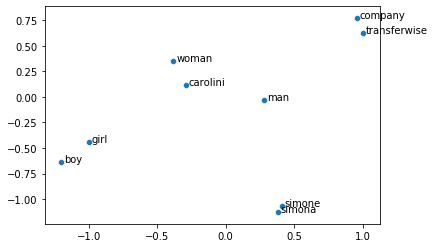

In [28]:
def plot_word2vec_representation(embeddings_dict: Type[Dict], words: Type[List]):
    x_1 = [i[0] for i in embeddings_dict.values()]
    x_2 = [i[1] for i in embeddings_dict.values()]

    ax = sns.scatterplot(x=x_1, y=x_2)

    for word, x, y in zip(words, x_1, x_2):
        ax.text(x+.02, y, word)

plot_word2vec_representation(embeddings_dict, words)